# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#pip install citipy


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib
import seaborn as sns

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#   print(city)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#OpenweatherMap API Key is in the API_key file

In [5]:
#URL for weatherMap API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7c0ee5b84376727e62f51432f4b59731


In [6]:
#list of citi data
city_data = []

In [7]:
#print to logger
print("Beggining Data Retrival")
print("----------------------")

#Create counters
record_count = 1
set_count = 1


#loop through all the cities in our list
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    #create endpoint url with each cit
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    #print(city_url)
    
    #log the url, record and set numbers
    print (f"Processing Record {record_count} of Set {set_count}) | {city}")
 
    
    #Add 1 to the record count
    record_count += 1
    
    #Run an API request for each of the cities
    try: 
        #parce the JSON and retrive data
        city_weather = requests.get(city_url).json()
        #print(city_weather)
        
        #parce out the max tem, humidity, cloudmess and wind speed
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"] 
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"] 
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #append the city into into city_data
        city_data.append({"City":city,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudness": city_clouds,
                         "Wind speed": city_wind,
                         "Country": city_country,
                         "Date":city_date})
        
# if an error experience, skip the city
    except:
        print("city not found. skipping...")
        pass

#Indicate that Data loading is complete
print("----------end------------")



Beggining Data Retrival
----------------------
Processing Record 1 of Set 1) | east london
Processing Record 2 of Set 1) | upernavik
Processing Record 3 of Set 1) | mutata
Processing Record 4 of Set 1) | cetraro
Processing Record 5 of Set 1) | kaitangata
Processing Record 6 of Set 1) | cabo san lucas
Processing Record 7 of Set 1) | hobart
Processing Record 8 of Set 1) | wanning
Processing Record 9 of Set 1) | hermanus
Processing Record 10 of Set 1) | karaul
city not found. skipping...
Processing Record 11 of Set 1) | thompson
Processing Record 12 of Set 1) | san patricio
Processing Record 13 of Set 1) | ushuaia
Processing Record 14 of Set 1) | albany
Processing Record 15 of Set 1) | fairhope
Processing Record 16 of Set 1) | japura
Processing Record 17 of Set 1) | butaritari
Processing Record 18 of Set 1) | mataura
Processing Record 19 of Set 1) | rikitea
Processing Record 20 of Set 1) | puerto ayora
Processing Record 21 of Set 1) | manzanillo
Processing Record 22 of Set 1) | punta aren

Processing Record 34 of Set 4) | pangnirtung
Processing Record 35 of Set 4) | penzance
Processing Record 36 of Set 4) | mumford
Processing Record 37 of Set 4) | yar-sale
Processing Record 38 of Set 4) | barbar
city not found. skipping...
Processing Record 39 of Set 4) | hunza
city not found. skipping...
Processing Record 40 of Set 4) | mugan
Processing Record 41 of Set 4) | lavrentiya
Processing Record 42 of Set 4) | morondava
Processing Record 43 of Set 4) | katsuura
Processing Record 44 of Set 4) | charcas
Processing Record 45 of Set 4) | tucuman
Processing Record 46 of Set 4) | mogadishu
Processing Record 47 of Set 4) | kamenka
Processing Record 48 of Set 4) | kazanka
Processing Record 49 of Set 4) | ananas
Processing Record 0 of Set 5) | pavlodar
Processing Record 1 of Set 5) | lebanon
Processing Record 2 of Set 5) | omsukchan
Processing Record 3 of Set 5) | qui nhon
Processing Record 4 of Set 5) | aswan
Processing Record 5 of Set 5) | victoria
Processing Record 6 of Set 5) | talar

Processing Record 18 of Set 8) | imeni babushkina
Processing Record 19 of Set 8) | blagoyevo
Processing Record 20 of Set 8) | nhulunbuy
Processing Record 21 of Set 8) | solwezi
Processing Record 22 of Set 8) | ajaccio
Processing Record 23 of Set 8) | tan an
Processing Record 24 of Set 8) | ola
Processing Record 25 of Set 8) | clyde river
Processing Record 26 of Set 8) | kruisfontein
Processing Record 27 of Set 8) | dingle
Processing Record 28 of Set 8) | meadow lake
Processing Record 29 of Set 8) | shelburne
Processing Record 30 of Set 8) | mount gambier
Processing Record 31 of Set 8) | the valley
Processing Record 32 of Set 8) | kuala kedah
Processing Record 33 of Set 8) | olga
Processing Record 34 of Set 8) | bengkulu
Processing Record 35 of Set 8) | harrisburg
Processing Record 36 of Set 8) | manyana
Processing Record 37 of Set 8) | marsabit
Processing Record 38 of Set 8) | paucartambo
city not found. skipping...
Processing Record 39 of Set 8) | hargeysa
Processing Record 40 of Set 

Processing Record 2 of Set 12) | neiafu
Processing Record 3 of Set 12) | esperantina
Processing Record 4 of Set 12) | salto
Processing Record 5 of Set 12) | cockburn harbour
city not found. skipping...
Processing Record 6 of Set 12) | ankang
Processing Record 7 of Set 12) | betki
city not found. skipping...
Processing Record 8 of Set 12) | bara
Processing Record 9 of Set 12) | bocaranga
city not found. skipping...
Processing Record 10 of Set 12) | nyurba
Processing Record 11 of Set 12) | ixtapa
Processing Record 12 of Set 12) | rio grande
Processing Record 13 of Set 12) | gao
Processing Record 14 of Set 12) | penarroya-pueblonuevo
Processing Record 15 of Set 12) | kendari
Processing Record 16 of Set 12) | polson
Processing Record 17 of Set 12) | vangaindrano
Processing Record 18 of Set 12) | rancho veloz
Processing Record 19 of Set 12) | marsh harbour
Processing Record 20 of Set 12) | batagay-alyta
Processing Record 21 of Set 12) | algiers
Processing Record 22 of Set 12) | ajmer
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#convert array of Json into Pandas DF
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudness,Wind speed,Country,Date
0,east london,-33.0153,27.9116,63.77,53,2,5.44,ZA,1623271182
1,upernavik,72.7868,-56.1549,36.28,87,100,2.51,GL,1623271191
2,mutata,7.2441,-76.4356,77.92,86,99,3.04,CO,1623271377
3,cetraro,39.5166,15.9416,67.24,88,85,3.04,IT,1623271377
4,kaitangata,-46.2817,169.8464,55.92,75,100,7.76,NZ,1623271208


In [13]:
# Extract relevant field from the FataFrame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudness = city_data_pd["Cloudness"]
wind_speed = city_data_pd["Wind speed"]

In [14]:
#Export cit_data into a csv file
city_data_pd.to_csv(output_data_file, index_label="City_ID")
city_data_pd.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudness,Wind speed,Country,Date
0,east london,-33.0153,27.9116,63.77,53,2,5.44,ZA,1623271182
1,upernavik,72.7868,-56.1549,36.28,87,100,2.51,GL,1623271191
2,mutata,7.2441,-76.4356,77.92,86,99,3.04,CO,1623271377
3,cetraro,39.5166,15.9416,67.24,88,85,3.04,IT,1623271377
4,kaitangata,-46.2817,169.8464,55.92,75,100,7.76,NZ,1623271208


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#Show record count and describe
city_data_pd.describe()


,Lat,Lng,Max Temp,Humidity,Cloudness,Wind speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,20.226902,13.707827,67.735651,70.190731,57.005348,8.044296,1.623271e+09
std,33.147457,90.472717,15.547692,20.932741,37.730600,5.268958,1.111756e+02
min,-54.800000,-175.200000,28.630000,4.000000,0.000000,0.000000,1.623271e+09
25%,-6.766900,-66.100000,56.280000,60.000000,20.000000,3.980000,1.623271e+09
50%,22.566700,16.119400,69.670000,75.000000,71.000000,6.910000,1.623271e+09
75%,47.500200,91.390300,79.950000,86.000000,95.000000,11.410000,1.623271e+09
max,78.218600,179.316700,107.350000,100.000000,100.000000,30.620000,1.623271e+09


In [25]:
print("the maximum humidity value is 100%, so there are no cities with humidity greater than 100% in our dataset")


the maximum humidity value is 100%, so there are no cities with humidity greater than 100% in our dataset


In [24]:
#  Get the indices of cities that have humidity over 100%.
R_test_stats = city_data_pd["Humidity"].describe(include = "all")
R_test_stats

count    561.000000
mean      70.190731
std       20.932741
min        4.000000
25%       60.000000
50%       75.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudness,Wind speed,Country,Date
0,east london,-33.0153,27.9116,63.77,53,2,5.44,ZA,1623271182
1,upernavik,72.7868,-56.1549,36.28,87,100,2.51,GL,1623271191
2,mutata,7.2441,-76.4356,77.92,86,99,3.04,CO,1623271377
3,cetraro,39.5166,15.9416,67.24,88,85,3.04,IT,1623271377
4,kaitangata,-46.2817,169.8464,55.92,75,100,7.76,NZ,1623271208


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

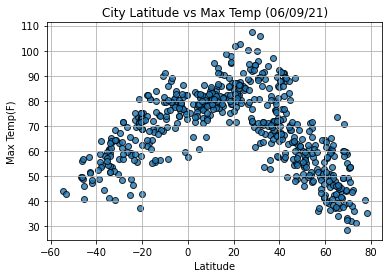

In [27]:
#Build scatter plot for latitude vs Temp
plt.scatter(lats, max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Max Temp ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
plt.grid(True)

#Show the figure
plt.savefig("output_data/Latitude-MaxTemp.png")

#Show the plot
plt.show()

## Latitude vs. Humidity Plot

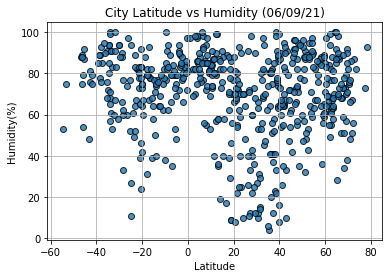

In [28]:
#Build scatter plot for latitude vs Temp
plt.scatter(lats, humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

#Show the figure
plt.savefig("output_data/Latitude-Humidity.png")

#Show the plot
plt.show()

## Latitude vs. Cloudiness Plot

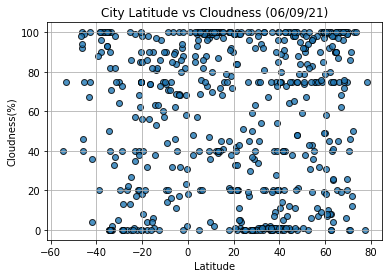

In [29]:
#Build scatter plot for latitude vs Temp
plt.scatter(lats, cloudness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Cloudness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudness(%)")
plt.grid(True)

#Show the figure
plt.savefig("output_data/Latitude-Cloudness.png")

#Show the plot
plt.show()

## Latitude vs. Wind Speed Plot

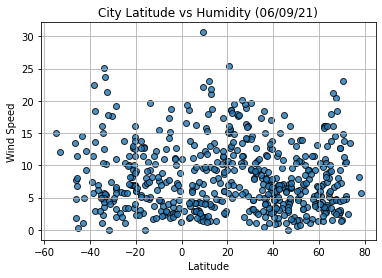

In [30]:
#Build scatter plot for latitude vs Temp
plt.scatter(lats, wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

#Show the figure
plt.savefig("output_data/CityLatitude-Humidity.png")

#Show the plot
plt.show()

## Linear Regression

In [31]:
# Create Northern and Southern Hemisphere DataFrames
L=0
Northern = city_data_pd.query(f"Lat >= {L}")
Southern = city_data_pd.query(f"Lat <= {L}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.756766755343451


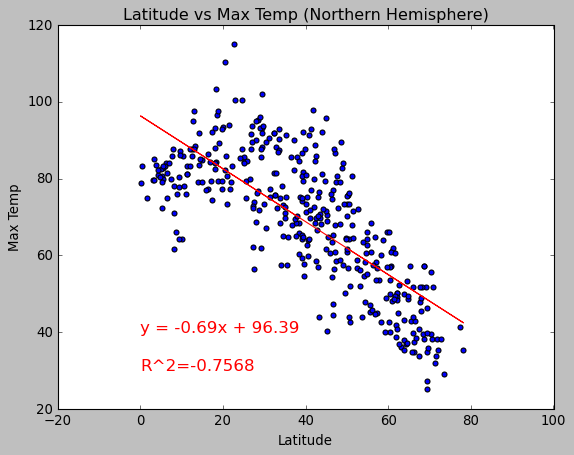

In [57]:
x_values=Northern['Lat']
y_values=Northern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Northern Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(0,30),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Max Temp (Northern Hemisphere).png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.7579408162718065


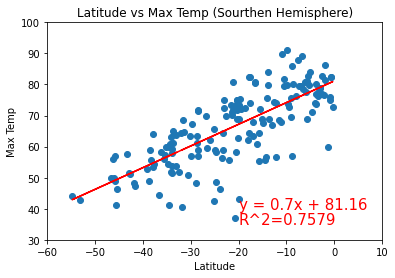

In [32]:
x_values=Southern["Lat"]
y_values=Southern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")

plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Sourthen Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(-20,35),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Max Temp (Southern Hemisphere).png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.042084687926511


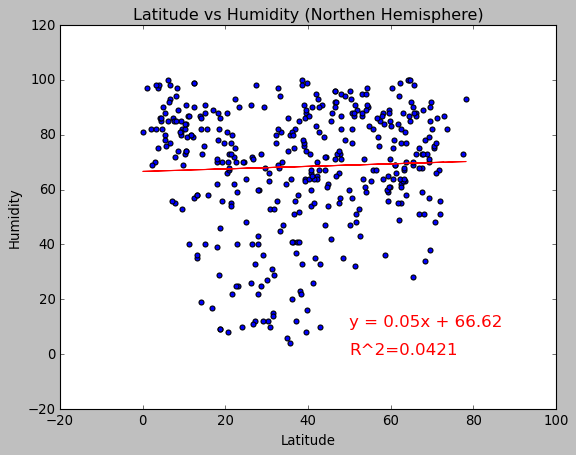

In [35]:
x_values=Northern["Lat"]
y_values=Northern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity (Northen Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(50,0),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Max Temp (Northern Hemisphere).png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.03701906345641275


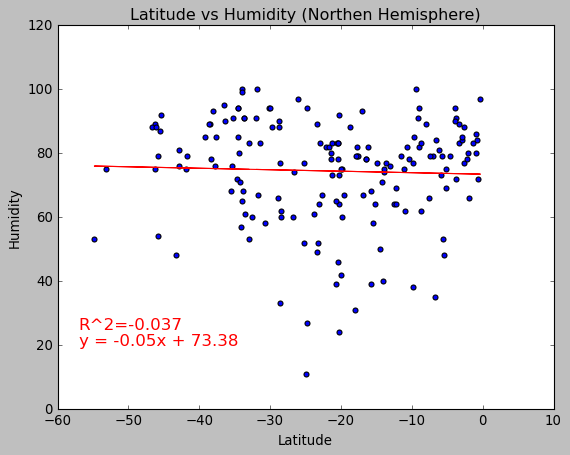

In [36]:
x_values=Southern["Lat"]
y_values=Southern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity (Northen Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(-57,25),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Humidity (Southern Hemisphere).png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.02727328371542486


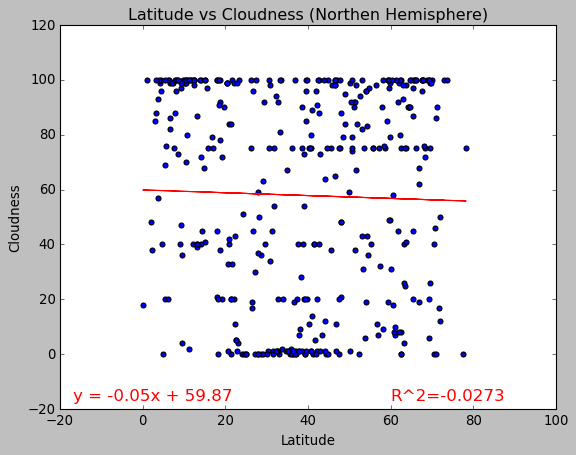

In [37]:
x_values=Northern["Lat"]
y_values=Northern["Cloudness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-17,-17),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudness')
plt.title('Latitude vs Cloudness (Northen Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(60,-17),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Cloudness (Northern Hemisphere).png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.0187643436553149


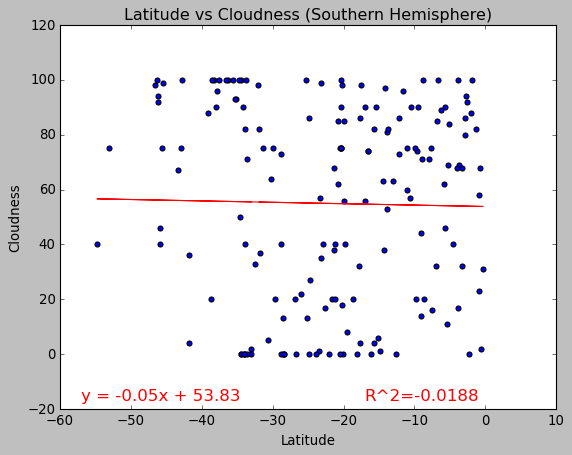

In [38]:
x_values= Southern["Lat"]
y_values= Southern["Cloudness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,-17),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudness')
plt.title('Latitude vs Cloudness (Southern Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(-17,-17),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Cloudness (Southern Hemisphere).png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.14156910707656883


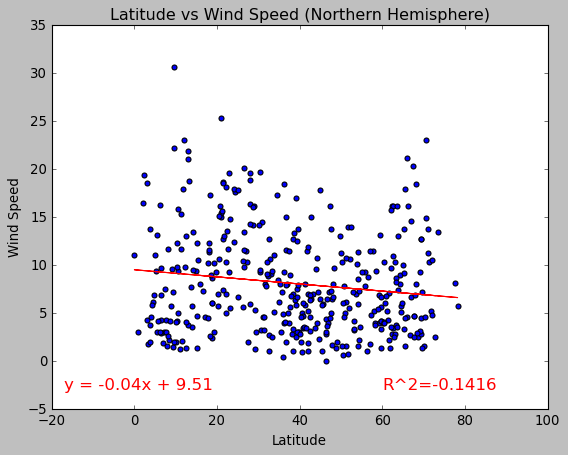

In [39]:
x_values= Northern["Lat"]
y_values= Northern["Wind speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-17,-3),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed (Northern Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(60,-3),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Wind Speed (Northern Hemisphere).png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.136748110695


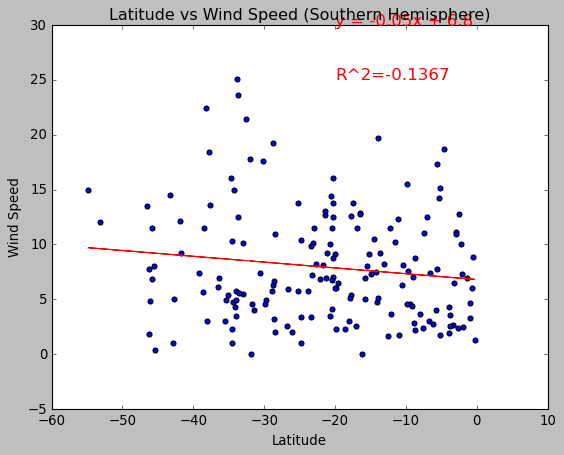

In [40]:
x_values= Southern["Lat"]
y_values= Southern["Wind speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed (Southern Hemisphere)')
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(-20,25),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Wind Speed (Southern Hemisphere).png")
plt.show()